In [8]:
import matplotlib.pyplot as plt
from multiprocessing import Pool 
from itertools import product
import numpy as np 

from scipy import integrate
import numpy 

def calculate_integrals(s, lam, h):
    
    # Here we numerically evaluate propagators for each diagram (a0, a, b1, b2, c) in the OLA
    # Note that $x$ is the fraction of the genome length between the points of interest that falls into loop
    
    # universal function that is used in expressions for all diagrams
    g_small = lambda x,y: (1-y)**(2*h)+(abs(y+x))**(2*h)-(abs(1-x-y))**(2*h)-(abs(y))**(2*h)
    
    # universal function that is used in expressions for all diagrams
    I = lambda x,y: 1/(1-0.25*(x**(-2*h))*(g_small(x,y)**2))**(1.5)
    
    # loop size PDF
    ro = lambda x: (1/lam)*np.exp(-s*x/lam)
    
    # propagator of the diagram (a0)
    f_a0 = lambda y,x: 2*(I(x,y)-1)*s*ro(x) 
    
    # propagator of the diagram (a)
    f_a = lambda y,x: I(x,y)*s*ro(x)
    
    # propagator of the diagram (b1)
    f_b1 = lambda y,x: 2*I(x,y)*s*ro(x)
    # propagator of the diagram (b2)
    f_b2 = lambda y,x: 2*I(x,y)*s*ro(x)
    
    # propagator of the diagram (c)
    f_c = lambda y,x: I(x,y)*s*ro(x)


    # averaging over configurations of points of interest with respect to the loop base
    i0 = integrate.dblquad(f_a0, 1, np.inf, lambda x: -np.inf, lambda x: -x)[0]
    i1 = integrate.dblquad(f_a, 0, 1, lambda x: 0, lambda x: 1-x)[0]
    i2 = integrate.dblquad(f_b1, 0, 1, lambda x: -x, lambda x: 0)[0]
    
    xmin=1
    xmax=np.inf
    i3 = integrate.dblquad(f_b2, xmin, xmax, lambda x: -x, lambda x: 1-x)[0]
    i4 = integrate.dblquad(f_c, xmin, xmax, lambda x: 1-x, lambda x: 0)[0]


    return i0+i1+i2+i3+i4

In [3]:
# log-binning the contour length interval [1, N]

from mirnylib.numutils import logbinsnew

chainLen = 10000
lbins = logbinsnew(1, chainLen, 1.3)
bins = [(lbins[i], lbins[i + 1]) for i in range(len(lbins) - 1)]
mids_num = np.array([np.sqrt(i[0] * (i[1] - 1)) for i in bins])
print(mids_num)

[1.00000000e+00 2.00000000e+00 3.00000000e+00 4.00000000e+00
 5.47722558e+00 7.48331477e+00 9.48683298e+00 1.24096736e+01
 1.68819430e+01 2.23606798e+01 2.92916370e+01 3.82361086e+01
 5.00799361e+01 6.59545298e+01 8.67409938e+01 1.14017543e+02
 1.49669636e+02 1.96285506e+02 2.57633461e+02 3.38017751e+02
 4.42954851e+02 5.81222849e+02 7.62070863e+02 9.99355792e+02
 1.31053424e+03 1.71827443e+03 2.25331755e+03 2.95491506e+03
 3.87445790e+03 5.07992047e+03 6.66036350e+03 8.73283305e+03]


In [6]:
lam = 100
d = 200
h = 1.1/3
with Pool(40) as mypool:
    res = np.array(mypool.starmap(calculate_integrals, list(product(mids_num, [lam], [h]))))
pc_l100_d200_h03 = (((res-1)*mids_num/lam-1)*(lam/d)+1)/(mids_num**(3*h))

lam = 100
d = 100
h = 1.1/3
with Pool(40) as mypool:
    res = np.array(mypool.starmap(calculate_integrals, list(product(mids_num, [lam], [h]))))
pc_l100_d100_h03 = (((res-1)*mids_num/lam-1)*(lam/d)+1)/(mids_num**(3*h))

lam = 100
d = 300
h = 1.1/3
with Pool(40) as mypool:
    res = np.array(mypool.starmap(calculate_integrals, list(product(mids_num, [lam], [h]))))
pc_l100_d300_h03 = (((res-1)*mids_num/lam-1)*(lam/d)+1)/(mids_num**(3*h))

lam = 100
d = 500
h = 1.1/3
with Pool(40) as mypool:
    res = np.array(mypool.starmap(calculate_integrals, list(product(mids_num, [lam], [h]))))
pc_l100_d500_h03 = (((res-1)*mids_num/lam-1)*(lam/d)+1)/(mids_num**(3*h))


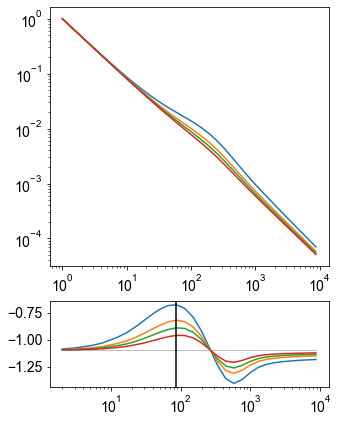

In [11]:
from matplotlib import gridspec
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
font = {'family' : 'Arial',
    'weight' : 'medium',
    'size'   : 14,
    'style'  : 'normal'}
matplotlib.rc('font', **font)


fig = plt.figure(figsize=(5, 7)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

ax0.plot(mids_num, pc_l100_d100_h03)
ax0.plot(mids_num, pc_l100_d200_h03)
ax0.plot(mids_num, pc_l100_d300_h03)
ax0.plot(mids_num, pc_l100_d500_h03)

ax0.set_xscale('log')
ax0.set_yscale('log')

ax1.plot(mids_num[1:], np.diff(np.log(pc_l100_d100_h03))/np.diff(np.log(mids_num)))
ax1.plot(mids_num[1:], np.diff(np.log(pc_l100_d200_h03))/np.diff(np.log(mids_num)))
ax1.plot(mids_num[1:], np.diff(np.log(pc_l100_d300_h03))/np.diff(np.log(mids_num)))
ax1.plot(mids_num[1:], np.diff(np.log(pc_l100_d500_h03))/np.diff(np.log(mids_num)))
ax1.plot(mids_num[1:], (-1.1)*np.ones(len(mids_num[1:])), color='gray', linewidth=0.5)

ax1.axvline(x=mids_num[1+np.argmax(np.diff(np.log(pc_l100_d100_h03))/np.diff(np.log(mids_num)))], color='k')
ax1.set_xscale('log')

plt.show()